# 0.1 - Time Series, Custom Class

In [2]:
# Import to be able to import python package from src
import sys

sys.path.insert(0, '../src')

In [3]:
import pandas as pd
import ontime as on

C:\Users\vince\AppData\Local\pypoetry\Cache\virtualenvs\ontime-FclhqCOu-py3.11\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


---
## Generation of random time series

In [4]:
ts = on.generators.random_walk().generate(start=pd.Timestamp('2022-01-01'), end=pd.Timestamp('2022-12-31'))

In [5]:
ts[0:5]

<TimeSeries (DataArray) (time: 5, component: 1, sample: 1)>
array([[[-0.6893183 ]],

       [[-1.34422176]],

       [[-0.33075927]],

       [[-0.12352778]],

       [[ 0.59187957]]])
Coordinates:
  * time       (time) datetime64[ns] 2022-01-01 2022-01-02 ... 2022-01-05
  * component  (component) object 'random_walk'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

---
## Use `TimeSeries` object

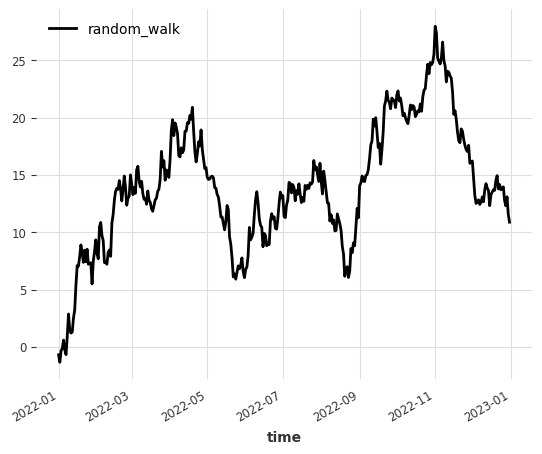

In [6]:
ts.plot();

---
## Custom Class Creation

### Create custom model

In [7]:
from ontime.abstract import AbstractBaseModel


class MyModel(AbstractBaseModel):

    def __init__(self):
        super().__init__()

    def fit(self, series):
        super().fit(series)
        print('I am fitted')

    def predict(self, n):
        super().predict(n)
        print('I predicted')


Load custom model in OnTime

In [8]:
on.models.get_all()

['arima', 'catboost', 'TCN']

In [9]:
on.models.load('my_model', MyModel)
on.models.get_all()

['arima', 'catboost', 'TCN', 'my_model']

In [10]:
m = on.models.my_model()

In [11]:
m.fit(ts)

I am fitted


In [12]:
m.predict(5)

I predicted


### Create custom detector

In [13]:
from ontime.abstract import AbstractBaseDetector


class MyDetector(AbstractBaseDetector):

    def __init__(self):
        super().__init__()

    def detect(self, ts):
        print('I detected')


Load custom detector in OnTime

In [14]:
on.detectors.get_all()

['threshold', 'quantile']

In [15]:
on.detectors.load('my_detector', MyDetector)

In [16]:
on.detectors.get_all()

['threshold', 'quantile', 'my_detector']

In [17]:
on.detectors.my_detector().detect(ts)

I detected


# Use restricted time series

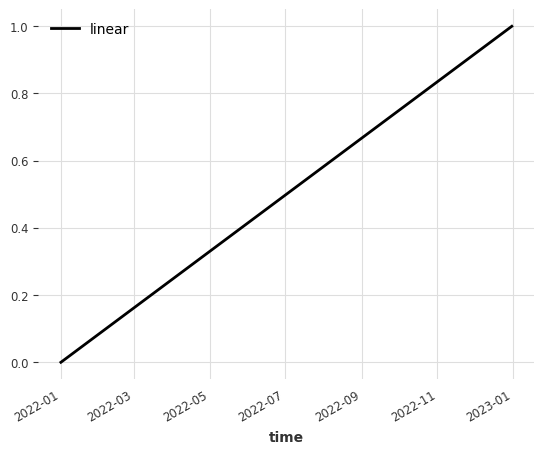

In [18]:
from ontime.time_series import ProbabilisticTimeSeries, BinaryTimeSeries

linear_ts = on.generators.linear().generate(start=pd.Timestamp('2022-01-01'),
                                            end=pd.Timestamp('2022-12-31'))
linear_ts.plot();

In [19]:
probabilistic_ts = ProbabilisticTimeSeries.from_darts(linear_ts)
probabilistic_ts

<TimeSeries (DataArray) (time: 365, component: 1, sample: 1)>
array([[[0.        ]],

       [[0.00274725]],

       [[0.00549451]],

       [[0.00824176]],

       [[0.01098901]],

       [[0.01373626]],

       [[0.01648352]],

       [[0.01923077]],

       [[0.02197802]],

       [[0.02472527]],

...

       [[0.97527473]],

       [[0.97802198]],

       [[0.98076923]],

       [[0.98351648]],

       [[0.98626374]],

       [[0.98901099]],

       [[0.99175824]],

       [[0.99450549]],

       [[0.99725275]],

       [[1.        ]]])
Coordinates:
  * time       (time) datetime64[ns] 2022-01-01 2022-01-02 ... 2022-12-31
  * component  (component) object 'linear'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [20]:
# see error : 
try:
    binary_ts = BinaryTimeSeries.from_darts(linear_ts)
except Exception as e:
    print(e)

Input DataArray contains values outside of {0; 1}


<Axes: xlabel='time'>

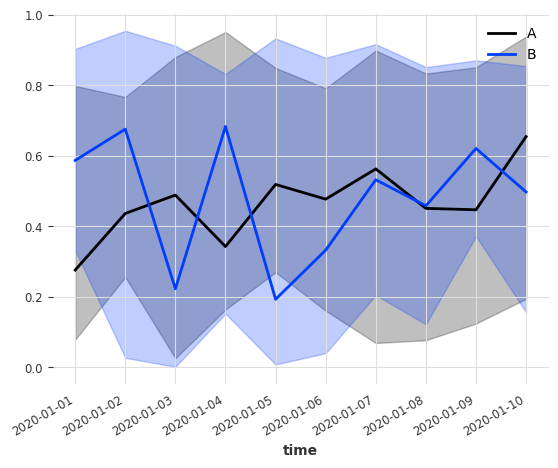

In [21]:

import xarray as xr
import numpy as np

# make a xarray with random values from 0 to 1
x_array = xr.DataArray(np.random.rand(10, 2, 10),
                       dims=('time', 'component', 'sample'),
                       coords={'time': pd.date_range('2020-01-01', periods=10),
                               'component': ['A', 'B'],
                               'sample': range(10)})

probabilistic_ts_1 = ProbabilisticTimeSeries(x_array)
probabilistic_ts_1.plot()


<Axes: xlabel='time'>

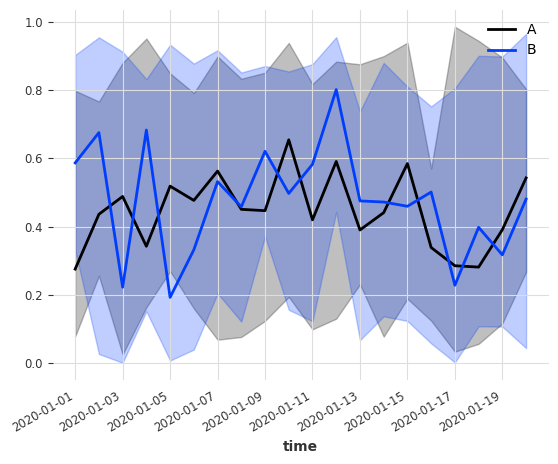

In [28]:
# make a xarray with random values from 0 to 1
x_array = xr.DataArray(np.random.rand(10, 2, 10),
                       dims=('time', 'component', 'sample'),
                       coords={'time': pd.date_range('2020-01-11', periods=10),
                               'component': ['A', 'B'],
                               'sample': range(10)})

probabilistic_ts_2 = ProbabilisticTimeSeries.from_xarray(x_array)

append_ts = probabilistic_ts_1.append(probabilistic_ts_2)
append_ts.plot()


NotImplementedError: 